# Dropsondes
Dropsondes were launched from Polar 5 providing profiles of air temperature, humidity, pressure, and the horizontal wind vector between flight altitude (3-4 km) and the surface. The full dataset is available on PANGAEA for [ACLOUD](https://doi.pangaea.de/10.1594/PANGAEA.900204), [AFLUX](https://doi.pangaea.de/10.1594/PANGAEA.921996), and [MOSAiC-ACA](https://doi.pangaea.de/10.1594/PANGAEA.933581). Each NetCDF file contains dropsondes of a single flight ordered into groups.

## Data access
* To analyse the data they first have to be loaded by importing the (AC)³airborne meta data catalogue. To do so the ac3airborne package has to be installed. More information on how to do that and about the catalog can be found [here](https://github.com/igmk/ac3airborne-intake#ac3airborne-intake-catalogue).

## Get data

In [1]:
import ac3airborne

List of flights, where dropsondes are available:

In [14]:
cat = ac3airborne.get_intake_catalog()

datasets = []
for campaign in ['ACLOUD', 'AFLUX','MOSAiC-ACA','HALO-AC3']:
    datasets.extend(list(cat[campaign]['P5']['DROPSONDES']))
datasets

['ACLOUD_P5_RF05',
 'ACLOUD_P5_RF06',
 'ACLOUD_P5_RF07',
 'ACLOUD_P5_RF10',
 'ACLOUD_P5_RF11',
 'ACLOUD_P5_RF13',
 'ACLOUD_P5_RF14',
 'ACLOUD_P5_RF16',
 'ACLOUD_P5_RF17',
 'ACLOUD_P5_RF18',
 'ACLOUD_P5_RF19',
 'ACLOUD_P5_RF20',
 'ACLOUD_P5_RF21',
 'ACLOUD_P5_RF22',
 'ACLOUD_P5_RF23',
 'AFLUX_P5_RF02',
 'AFLUX_P5_RF04',
 'AFLUX_P5_RF05',
 'AFLUX_P5_RF06',
 'AFLUX_P5_RF07',
 'AFLUX_P5_RF08',
 'AFLUX_P5_RF09',
 'AFLUX_P5_RF10',
 'AFLUX_P5_RF15',
 'MOSAiC-ACA_P5_RF05',
 'MOSAiC-ACA_P5_RF06',
 'MOSAiC-ACA_P5_RF07',
 'MOSAiC-ACA_P5_RF08',
 'MOSAiC-ACA_P5_RF09',
 'MOSAiC-ACA_P5_RF10',
 'MOSAiC-ACA_P5_RF11',
 'HALO-AC3_P5_RF01',
 'HALO-AC3_P5_RF02',
 'HALO-AC3_P5_RF03',
 'HALO-AC3_P5_RF04',
 'HALO-AC3_P5_RF05',
 'HALO-AC3_P5_RF07',
 'HALO-AC3_P5_RF08',
 'HALO-AC3_P5_RF09',
 'HALO-AC3_P5_RF10',
 'HALO-AC3_P5_RF11',
 'HALO-AC3_P5_RF12']

## Dataset
To get an overview of the variables recorded by the dropsondes, we load the first dropsonde released during `ACLOUD_P5_RF05`.

In [3]:
ds_dsd = cat['ACLOUD']['P5']['DROPSONDES']['ACLOUD_P5_RF05'](i_sonde=1).to_dask()
ds_dsd

Invalid MIT-MAGIC-COOKIE-1 key

<xarray.Dataset>
Dimensions:     (z: 529)
Dimensions without coordinates: z
Data variables:
    GPS_Alt     (z) float32 ...
    Baro_Alt    (z) float32 ...
    Time        (z) float32 ...
    Lat         (z) float32 ...
    Lon         (z) float32 ...
    Pressure    (z) float32 ...
    Temp        (z) float32 ...
    Temp_recon  (z) float32 ...
    RHum        (z) float32 ...
    RHum_recon  (z) float32 ...
    Wind_vel    (z) float32 ...
    Wind_dir    (z) float32 ...
Attributes:
    Dropsonde_number_of_flight:  1
    Launch_Time_UTC:             09:09:10
    Sonde_ID:                    162715269/RS904

### View variables
Below are vertical profiles of temperature, relative humidity, wind velocity and wind direction of that dropsonde shown.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use("../../mplstyle/book")

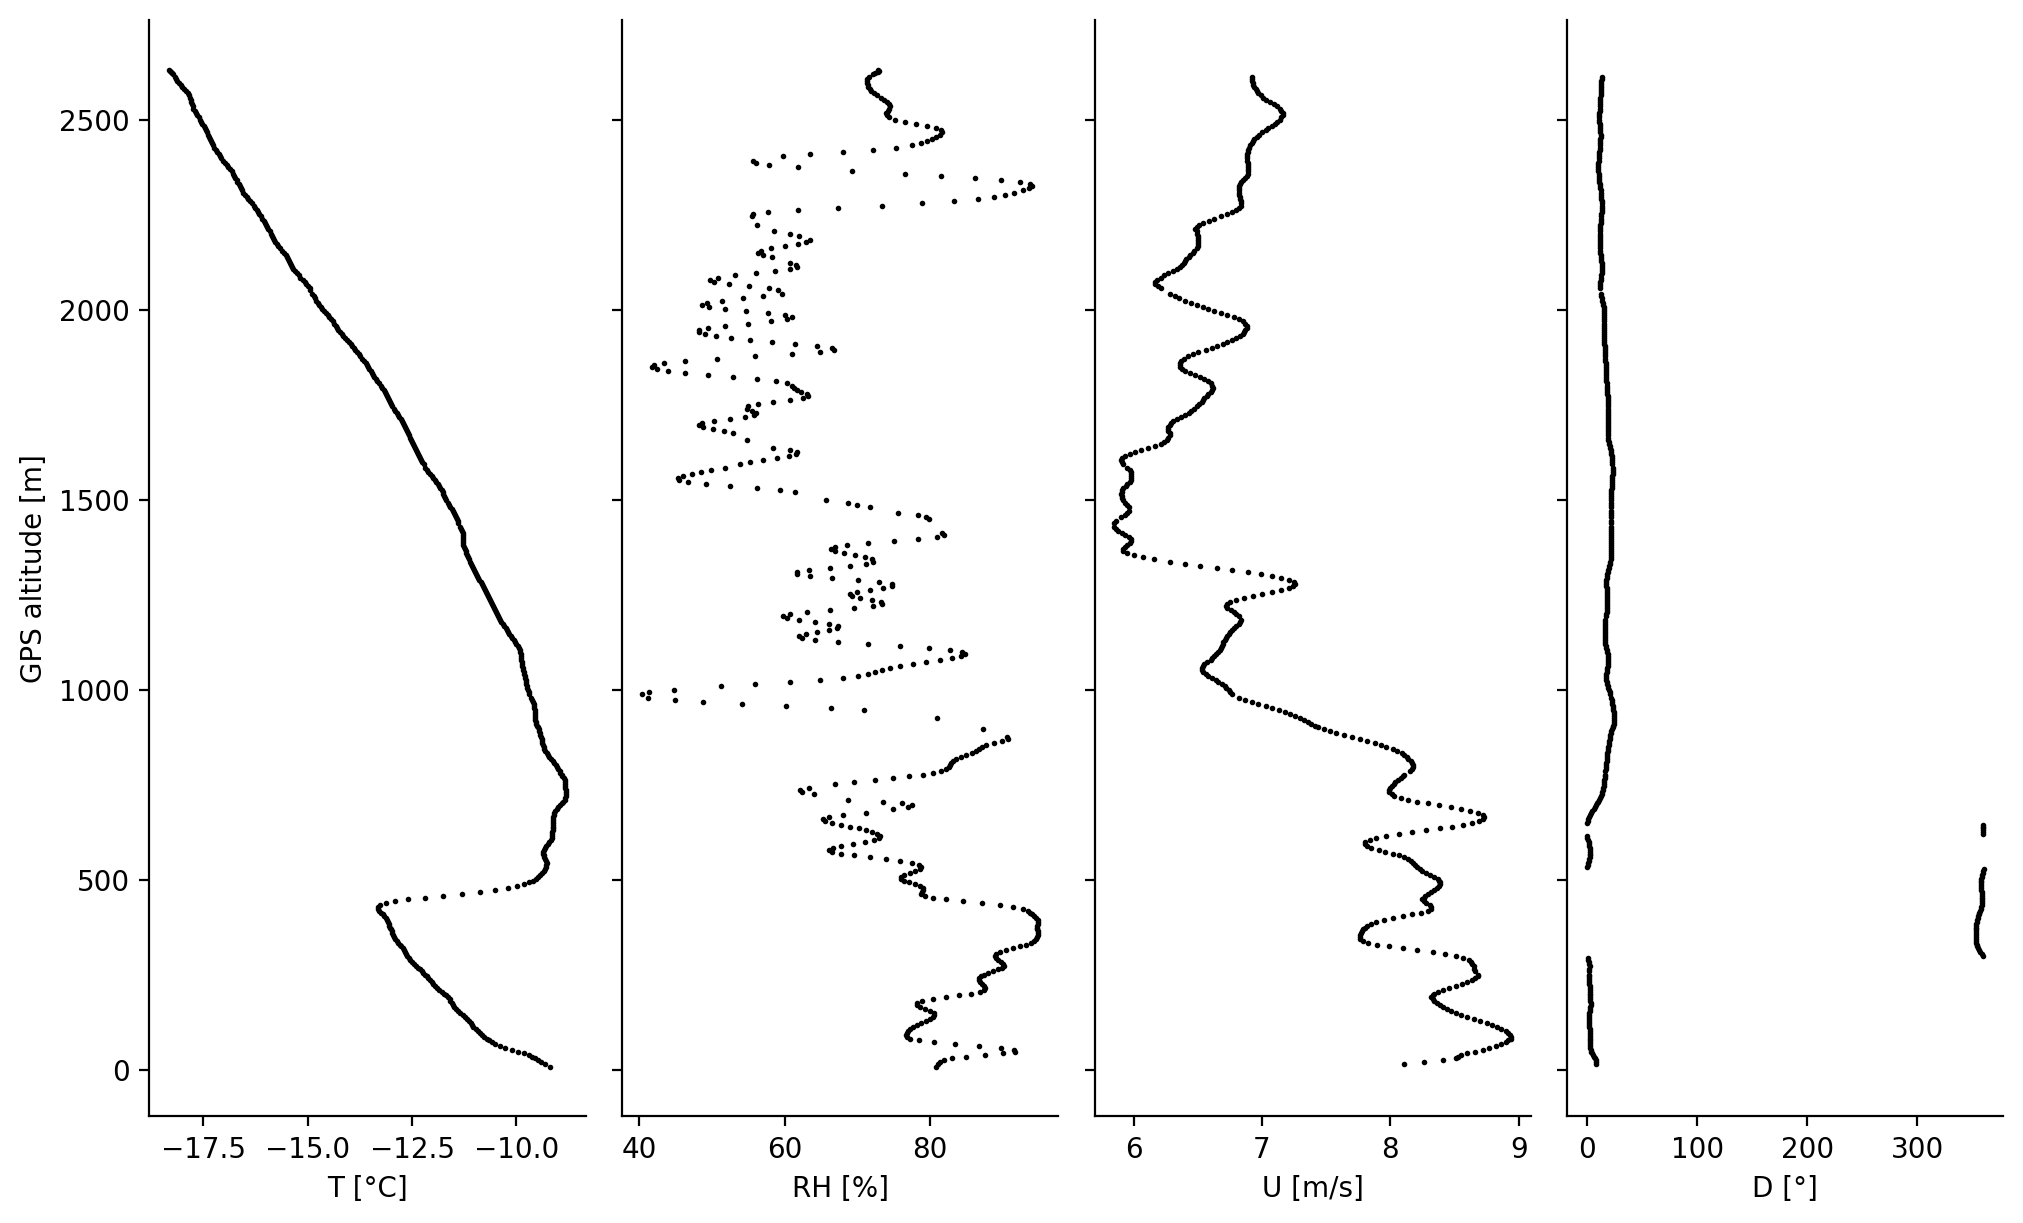

In [5]:
fig, ax = plt.subplots(1, 4, sharey=True)

var_names = ['Temp_recon', 'RHum_recon', 'Wind_vel', 'Wind_dir']
labels = ['T [°C]', 'RH [%]', 'U [m/s]', 'D [°]']

kwargs = dict(s=1, color='k')
for i, var_name in enumerate(var_names):
    
    ax[i].scatter(ds_dsd[var_name], ds_dsd.GPS_Alt, **kwargs)
    
    ax[i].set_xlabel(labels[i])

ax[0].set_ylabel('GPS altitude [m]')
    
plt.show()

## Load Polar 5 flight phase information
Polar 5 flights are divided into segments to easily access start and end times of flight patterns. For more information have a look at the respective [github](https://github.com/igmk/flight-phase-separation) repository.

At first we want to load the flight segments of (AC)³airborne

In [6]:
meta = ac3airborne.get_flight_segments() 

Create a list with all dropsondes during the campaigns:

In [7]:
ds_dict = {'ACLOUD': {}, 'AFLUX': {}, 'MOSAiC-ACA': {},'HALO-AC3': {}}
for campaign in meta.values():
    for platform in campaign.values():
        for flight in platform.values():
            for segment in flight['segments']:
                if 'dropsondes' in segment.keys() and segment['dropsondes']:
                    for sonde in segment['dropsondes']:
                        params = {'segment_id': segment['segment_id'],
                                  'flight_id': flight['flight_id'],
                                  'date': flight['date'],
                                  'name': flight['name'],
                                 }
                        ds_dict[flight['mission']][sonde] = params
                        print(sonde)

ACLOUD_P5_RF05_DS01
ACLOUD_P5_RF05_DS02
ACLOUD_P5_RF05_DS03
ACLOUD_P5_RF05_DS04
ACLOUD_P5_RF05_DS05
ACLOUD_P5_RF05_DS06
ACLOUD_P5_RF05_DS07
ACLOUD_P5_RF06_DS01
ACLOUD_P5_RF06_DS02
ACLOUD_P5_RF06_DS03
ACLOUD_P5_RF07_DS01
ACLOUD_P5_RF07_DS02
ACLOUD_P5_RF07_DS03
ACLOUD_P5_RF10_DS01
ACLOUD_P5_RF10_DS02
ACLOUD_P5_RF11_DS01
ACLOUD_P5_RF11_DS02
ACLOUD_P5_RF11_DS03
ACLOUD_P5_RF13_DS01
ACLOUD_P5_RF13_DS02
ACLOUD_P5_RF13_DS03
ACLOUD_P5_RF14_DS01
ACLOUD_P5_RF14_DS02
ACLOUD_P5_RF14_DS03
ACLOUD_P5_RF14_DS04
ACLOUD_P5_RF14_DS05
ACLOUD_P5_RF14_DS06
ACLOUD_P5_RF16_DS01
ACLOUD_P5_RF17_DS01
ACLOUD_P5_RF17_DS02
ACLOUD_P5_RF17_DS03
ACLOUD_P5_RF18_DS01
ACLOUD_P5_RF18_DS02
ACLOUD_P5_RF18_DS03
ACLOUD_P5_RF18_DS04
ACLOUD_P5_RF18_DS05
ACLOUD_P5_RF18_DS06
ACLOUD_P5_RF18_DS07
ACLOUD_P5_RF19_DS01
ACLOUD_P5_RF19_DS02
ACLOUD_P5_RF19_DS03
ACLOUD_P5_RF19_DS04
ACLOUD_P5_RF19_DS05
ACLOUD_P5_RF20_DS01
ACLOUD_P5_RF20_DS02
ACLOUD_P5_RF20_DS03
ACLOUD_P5_RF20_DS04
ACLOUD_P5_RF21_DS01
ACLOUD_P5_RF21_DS02
ACLOUD_P5_RF22_DS01


Get total number of dropsondes during the campaigns:

In [8]:
for mission, sondes in ds_dict.items():
    n = len(sondes.values())
    print('{n} dropsondes are available from {mission}.'.format(
        n=n, mission=mission))

55 dropsondes are available from ACLOUD.
33 dropsondes are available from AFLUX.
60 dropsondes are available from MOSAiC-ACA.
47 dropsondes are available from HALO-AC3.


In [9]:
for it in ds_dict['ACLOUD'].items():
    print(it)

('ACLOUD_P5_RF05_DS01', {'segment_id': 'ACLOUD_P5_RF05_hl02', 'flight_id': 'ACLOUD_P5_RF05', 'date': datetime.date(2017, 5, 25), 'name': 'RF05'})
('ACLOUD_P5_RF05_DS02', {'segment_id': 'ACLOUD_P5_RF05_hl02', 'flight_id': 'ACLOUD_P5_RF05', 'date': datetime.date(2017, 5, 25), 'name': 'RF05'})
('ACLOUD_P5_RF05_DS03', {'segment_id': 'ACLOUD_P5_RF05_hl03', 'flight_id': 'ACLOUD_P5_RF05', 'date': datetime.date(2017, 5, 25), 'name': 'RF05'})
('ACLOUD_P5_RF05_DS04', {'segment_id': 'ACLOUD_P5_RF05_hl05', 'flight_id': 'ACLOUD_P5_RF05', 'date': datetime.date(2017, 5, 25), 'name': 'RF05'})
('ACLOUD_P5_RF05_DS05', {'segment_id': 'ACLOUD_P5_RF05_hl07', 'flight_id': 'ACLOUD_P5_RF05', 'date': datetime.date(2017, 5, 25), 'name': 'RF05'})
('ACLOUD_P5_RF05_DS06', {'segment_id': 'ACLOUD_P5_RF05_hl09', 'flight_id': 'ACLOUD_P5_RF05', 'date': datetime.date(2017, 5, 25), 'name': 'RF05'})
('ACLOUD_P5_RF05_DS07', {'segment_id': 'ACLOUD_P5_RF05_hl10', 'flight_id': 'ACLOUD_P5_RF05', 'date': datetime.date(2017, 5, 

In [10]:
for sonde_id, params in ds_dict['ACLOUD'].items():
    print(sonde_id[-2:])

01
02
03
04
05
06
07
01
02
03
01
02
03
01
02
01
02
03
01
02
03
01
02
03
04
05
06
01
01
02
03
01
02
03
04
05
06
07
01
02
03
04
05
01
02
03
04
01
02
01
02
03
04
01
02


ACLOUD ACLOUD_P5_RF05 1
ACLOUD ACLOUD_P5_RF05 2
ACLOUD ACLOUD_P5_RF05 3
ACLOUD ACLOUD_P5_RF05 4
ACLOUD ACLOUD_P5_RF05 5
ACLOUD ACLOUD_P5_RF05 6
ACLOUD ACLOUD_P5_RF05 7
ACLOUD ACLOUD_P5_RF06 1
ACLOUD ACLOUD_P5_RF06 2
ACLOUD ACLOUD_P5_RF06 3
ACLOUD ACLOUD_P5_RF07 1
ACLOUD ACLOUD_P5_RF07 2
ACLOUD ACLOUD_P5_RF07 3
ACLOUD ACLOUD_P5_RF10 1
ACLOUD ACLOUD_P5_RF10 2
ACLOUD ACLOUD_P5_RF11 1
ACLOUD ACLOUD_P5_RF11 2
ACLOUD ACLOUD_P5_RF11 3
ACLOUD ACLOUD_P5_RF13 1
ACLOUD ACLOUD_P5_RF13 2
ACLOUD ACLOUD_P5_RF13 3
ACLOUD ACLOUD_P5_RF14 1
ACLOUD ACLOUD_P5_RF14 2
ACLOUD ACLOUD_P5_RF14 3
ACLOUD ACLOUD_P5_RF14 4
ACLOUD ACLOUD_P5_RF14 5
ACLOUD ACLOUD_P5_RF14 6
ACLOUD ACLOUD_P5_RF16 1
ACLOUD ACLOUD_P5_RF17 1
ACLOUD ACLOUD_P5_RF17 2
ACLOUD ACLOUD_P5_RF17 3
ACLOUD ACLOUD_P5_RF18 1
ACLOUD ACLOUD_P5_RF18 2
ACLOUD ACLOUD_P5_RF18 3
ACLOUD ACLOUD_P5_RF18 4
ACLOUD ACLOUD_P5_RF18 5
ACLOUD ACLOUD_P5_RF18 6
ACLOUD ACLOUD_P5_RF18 7
ACLOUD ACLOUD_P5_RF19 1
ACLOUD ACLOUD_P5_RF19 2
ACLOUD ACLOUD_P5_RF19 3
ACLOUD ACLOUD_P5

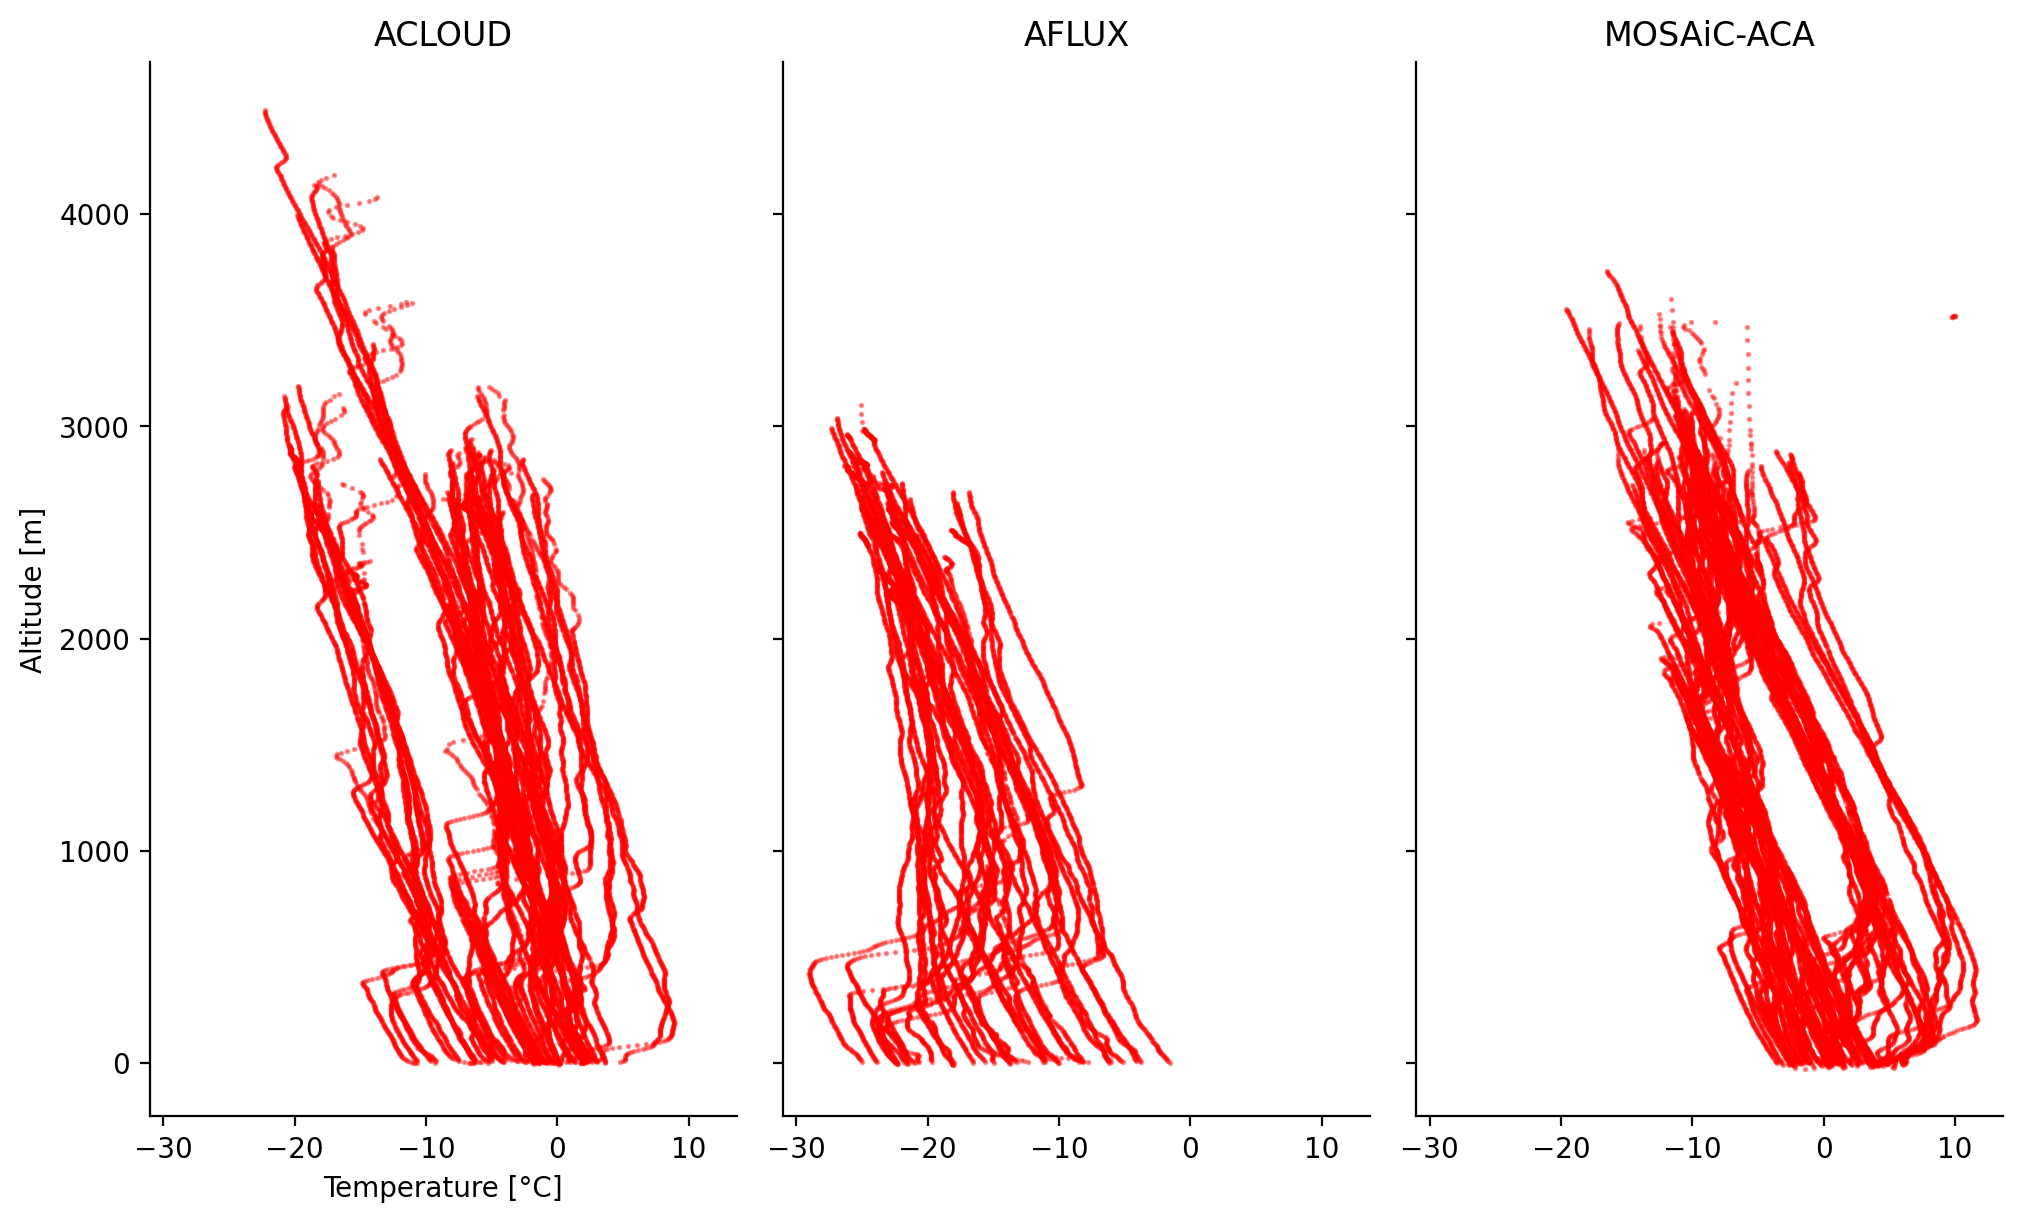

In [11]:
fig, axes = plt.subplots(1, 3, sharey=True, sharex=True)

ax = {'ACLOUD': axes[0], 'AFLUX': axes[1], 'MOSAiC-ACA': axes[2]}

kwargs = dict(s=1, color='red', alpha=0.4)
for mission, sondes in ds_dict.items():
    
    if mission != 'HALO-AC3':
        ax[mission].set_title(mission)

        for sonde_id, params in ds_dict[mission].items():

            # read dropsonde data
            i_sonde = int(sonde_id[-2:])
            ds = cat[mission]['P5']['DROPSONDES'][params['flight_id']](i_sonde=i_sonde).to_dask()

            ax[mission].scatter(ds.Temp_recon, ds.GPS_Alt, **kwargs)

axes[0].set_ylabel('Altitude [m]')
axes[0].set_xlabel('Temperature [°C]')
   
plt.show()

### Humidity profile

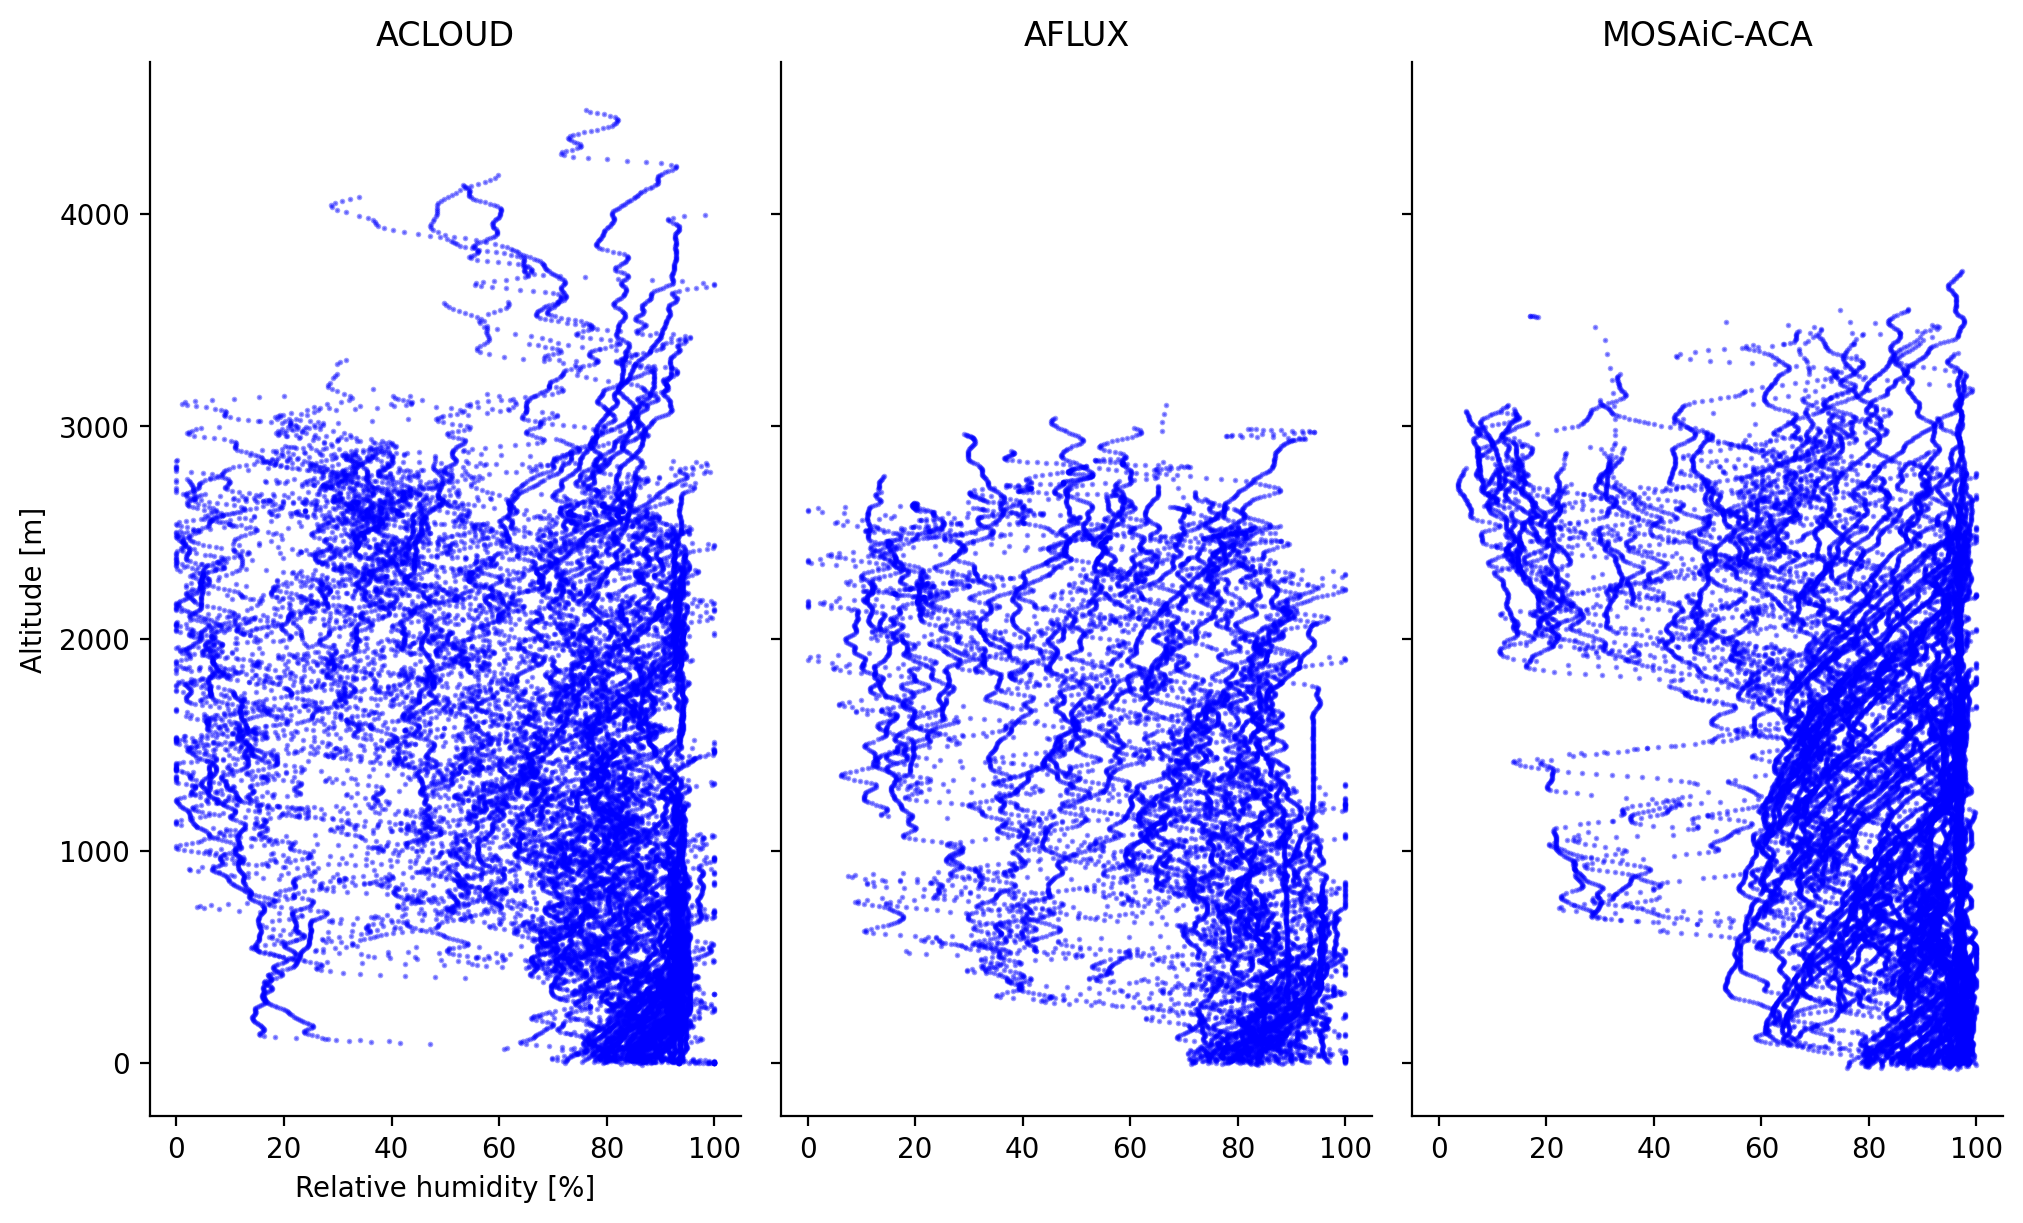

In [12]:
fig, axes = plt.subplots(1, 3, sharey=True, sharex=True)

ax = {'ACLOUD': axes[0], 'AFLUX': axes[1], 'MOSAiC-ACA': axes[2]}

kwargs = dict(s=1, color='blue', alpha=0.4)
for mission, sondes in ds_dict.items():

    if mission != 'HALO-AC3':
        ax[mission].set_title(mission)

        for sonde_id, params in ds_dict[mission].items():

            # read dropsonde data
            i_sonde = int(sonde_id[-2:])
            ds = cat[mission]['P5']['DROPSONDES'][params['flight_id']](i_sonde=i_sonde).to_dask()

            ax[mission].scatter(ds.RHum_recon, ds.GPS_Alt, **kwargs)

axes[0].set_ylabel('Altitude [m]')
axes[0].set_xlabel('Relative humidity [%]')

plt.show()

### Wind profile

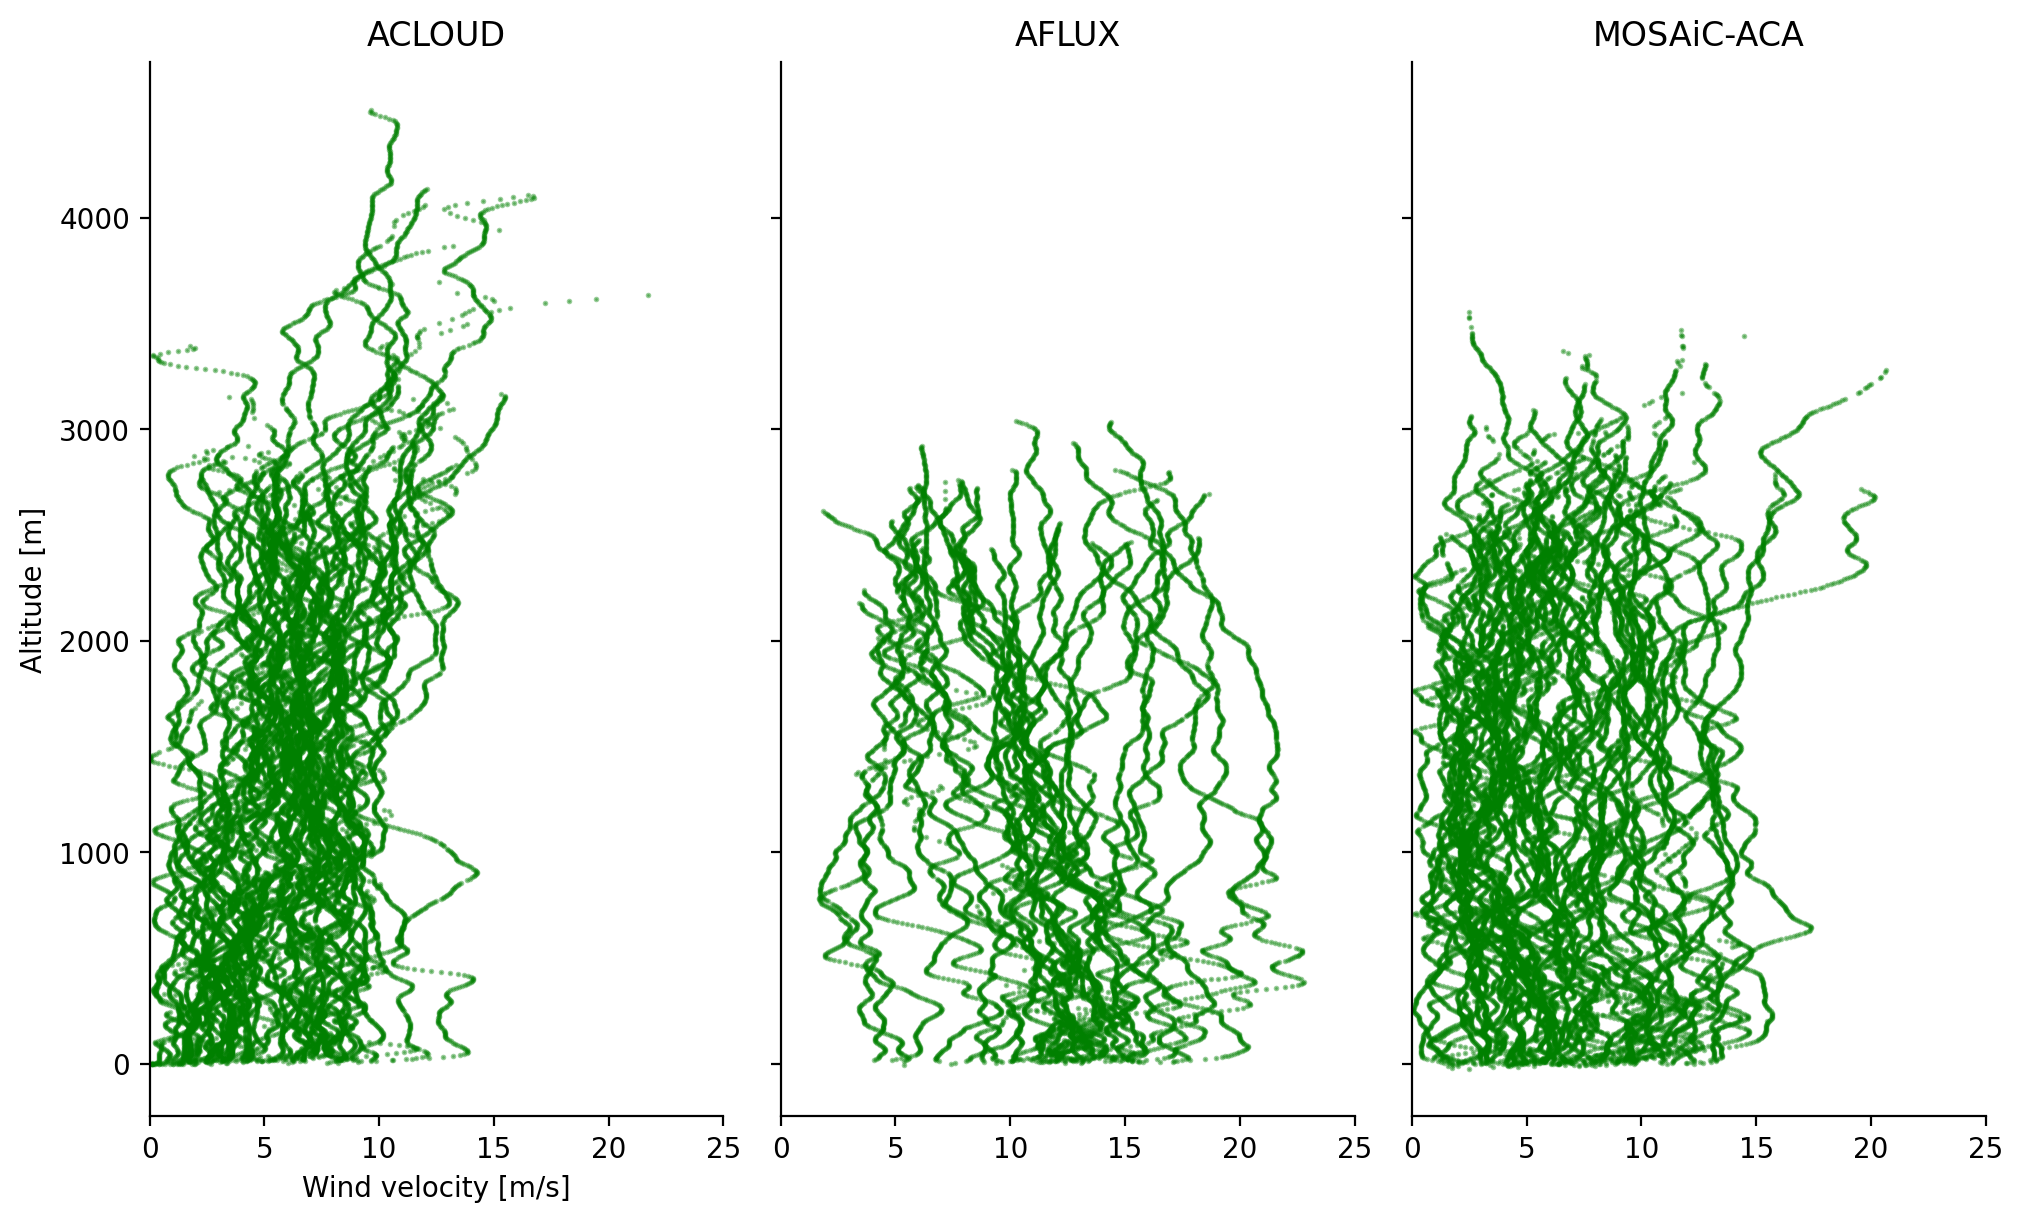

In [13]:
fig, axes = plt.subplots(1, 3, sharey=True)

ax = {'ACLOUD': axes[0], 'AFLUX': axes[1], 'MOSAiC-ACA': axes[2]}

kwargs = dict(s=1, color='green', alpha=0.4)
for mission, sondes in ds_dict.items():

    if mission != 'HALO-AC3':
        ax[mission].set_title(mission)
        ax[mission].set_xlim(0, 25)

        for sonde_id, params in ds_dict[mission].items():

            # read dropsonde data
            i_sonde = int(sonde_id[-2:])
            ds = cat[mission]['P5']['DROPSONDES'][params['flight_id']](i_sonde=i_sonde).to_dask()

            ax[mission].scatter(ds.Wind_vel, ds.GPS_Alt, **kwargs)

axes[0].set_ylabel('Altitude [m]')
axes[0].set_xlabel('Wind velocity [m/s]')

plt.show()